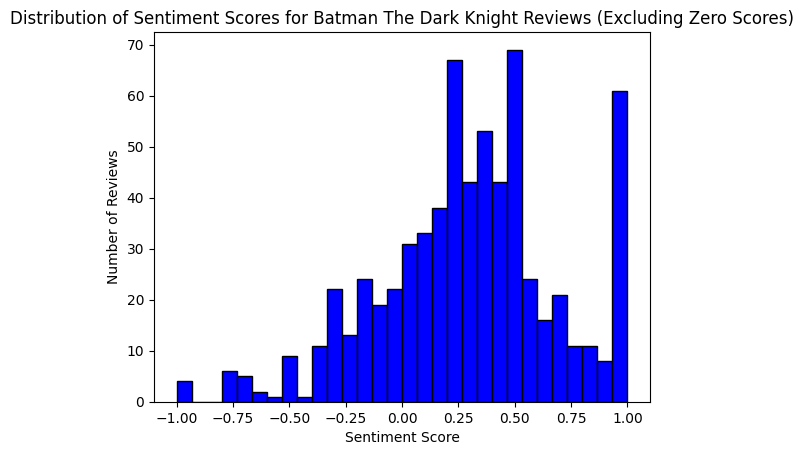

In [27]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to scrape reviews from a single page
def scrape_letterboxd_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all("div", class_="body-text -prose collapsible-text")

    review_texts = []
    for review in reviews:
        review_text = review.get_text(strip=True)
        review_texts.append(review_text)

    return review_texts

# Analyze sentiment with TextBlob
def analyze_sentiment_textblob(reviews):
    sentiments = []
    for review in reviews:
        blob = TextBlob(review)
        sentiment_polarity = blob.sentiment.polarity
        if sentiment_polarity != 0:  # Filter out zero scores
            sentiments.append(sentiment_polarity)
    return sentiments

# Collect reviews from multiple pages
all_reviews = []
for i in range(1, 101):  # Loop through first 10 pages
    url = f"https://letterboxd.com/film/the-dark-knight/reviews/page/{i}/"
    page_reviews = scrape_letterboxd_reviews(url)
    all_reviews.extend(page_reviews)

# Analyze all collected reviews
all_sentiments = analyze_sentiment_textblob(all_reviews)

# Plotting histogram
plt.hist(all_sentiments, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Sentiment Scores for Batman The Dark Knight Reviews (Excluding Zero Scores)')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.show()

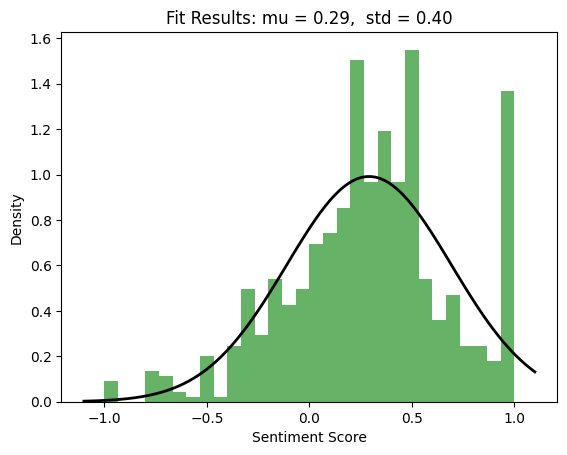

In [28]:
import numpy as np
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
from scipy.stats import norm

# Fit a Gaussian to the data
mu, std = norm.fit(all_sentiments)

# Plotting histogram and Gaussian
plt.hist(all_sentiments, bins=30, density=True, alpha=0.6, color='g')

# Plot the Gaussian
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = f"Fit Results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

In [29]:
pip install wordcloud

In [30]:
positive_reviews = " ".join([review for review, score in zip(all_reviews, all_sentiments) if score > 0])
negative_reviews = " ".join([review for review, score in zip(all_reviews, all_sentiments) if score < 0])

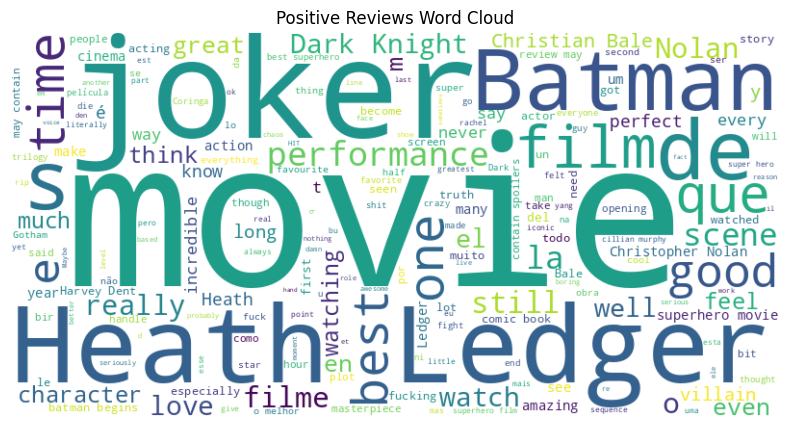

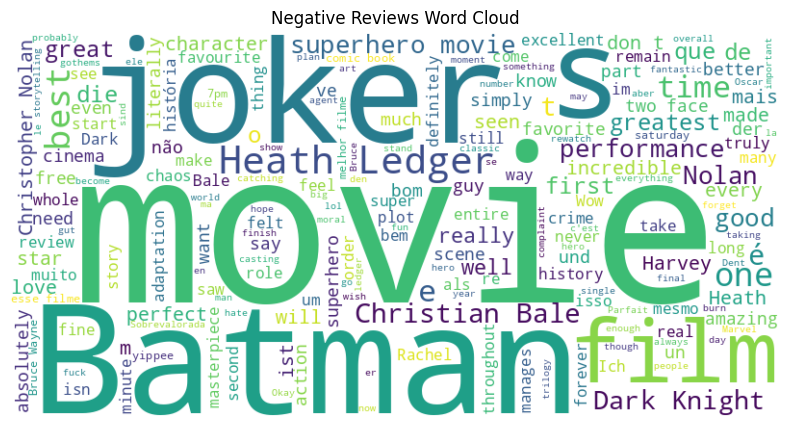

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word clouds
generate_wordcloud(positive_reviews, "Positive Reviews Word Cloud")
generate_wordcloud(negative_reviews, "Negative Reviews Word Cloud")

In [32]:
stop_words = ["watch", "watched", "movie", "film", "filme", "look", "see","movies","Movie", "Movies"]

In [33]:
import re

def remove_emojis(text):
    # Unicode ranges for emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [34]:
def preprocess_text(text, stop_words):
    text_no_emojis = remove_emojis(text)
    words = text_no_emojis.split()
    # Filter out stop words and words with less than 3 characters
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 3]
    return " ".join(filtered_words)

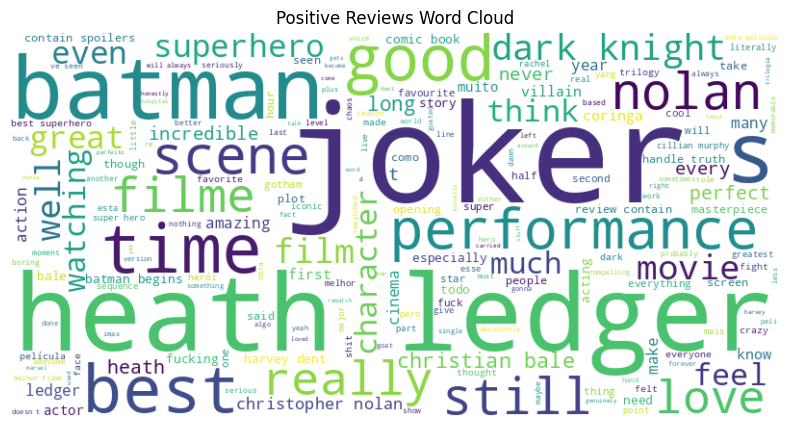

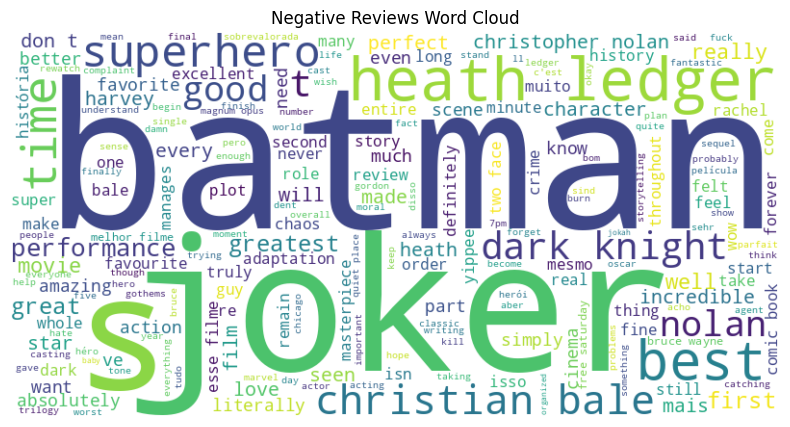

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stop_words = set(STOPWORDS).union(["watch", "watched", "movie", "film","film.","movies." "filme", "look", "see","movies","Movie", "Movies","movie.", "Nolan.","Zimmer."])

# Preprocess review texts
positive_reviews_processed = preprocess_text(positive_reviews.lower(), stop_words)
negative_reviews_processed = preprocess_text(negative_reviews.lower(), stop_words)

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word clouds
generate_wordcloud(positive_reviews_processed, "Positive Reviews Word Cloud")
generate_wordcloud(negative_reviews_processed, "Negative Reviews Word Cloud")

In [36]:
def find_unique_words(text1, text2):
    words1 = set(text1.split())
    words2 = set(text2.split())
    return ' '.join(words1 - words2), ' '.join(words2 - words1)

# Assuming 'positive_reviews_processed' and 'negative_reviews_processed' contain the preprocessed review texts
unique_positive, unique_negative = find_unique_words(positive_reviews_processed, negative_reviews_processed)

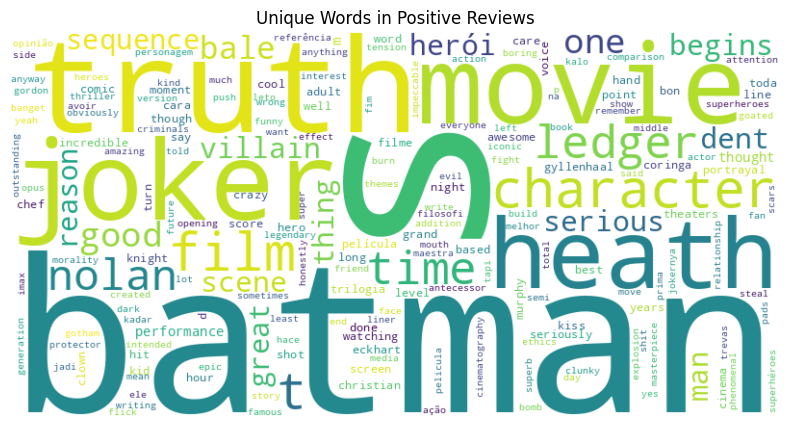

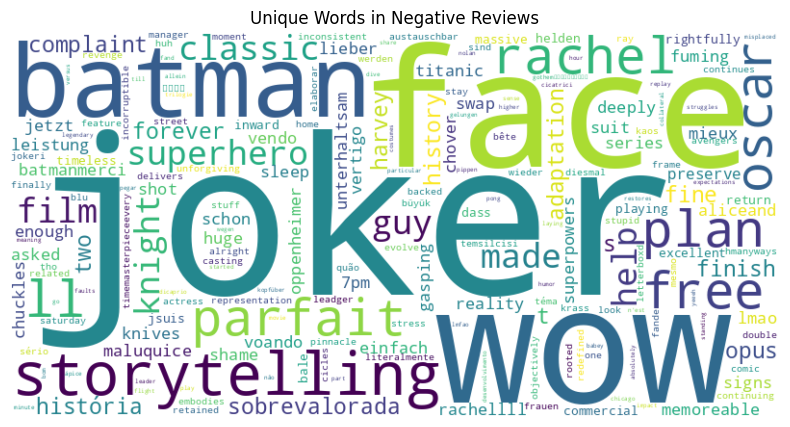

In [37]:
# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

# Generate word clouds for unique words
generate_wordcloud(unique_positive, "Unique Words in Positive Reviews")
generate_wordcloud(unique_negative, "Unique Words in Negative Reviews")